# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [ ]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import time
from maddpg import MADDPG
from collections import deque

# hyperparameter
fc1 = 400
fc2 = 300
random_seed = 3
buffer_size=int(1e5)
batch_size=512
tau=1e-1
gamma=0.99
lr_actor=1e-4
lr_critic=1e-4
weight_decay=0

print('Hyperparameter list:')
print('\tBuffer Size: {:d}'.format(buffer_size))
print('\tBatch Size: {:d}'.format(batch_size))
print('\tSoft update of target parameter: {:f}'.format(tau))
print('\tDiscount factor: {:f}'.format(gamma))
print('\tLearning Rate of Actor: {:f}'.format(lr_actor))
print('\tLearning Rate of Critic: {:f}'.format(lr_critic))
print('\tWeight Decay: {:f}'.format(weight_decay))

Hyperparameter list:
	Buffer Size: 100000
	Batch Size: 512
	Soft update of target parameter: 0.100000
	Discount factor: 0.990000
	Learning Rate of Actor: 0.000100
	Learning Rate of Critic: 0.000100
	Weight Decay: 0.000000


In [6]:
agent = MADDPG(state_size, action_size, num_agents, fc1, fc2, random_seed,
               buffer_size, batch_size, tau, gamma, lr_actor, lr_critic, weight_decay)

agent.print_agent_network()

agent 1:
Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
Critic(
  (fcs1): Linear(in_features=52, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)


agent 2:
Actor(
  (fc1): Linear(in_features=24, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=2, bias=True)
)
Critic(
  (fcs1): Linear(in_features=52, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=1, bias=True)
)




In [7]:
def ddpg(n_episodes=10000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    start_time = time.time()
    print('Start Training ....')
    print('Printing 1) Average Score, 2)Lowest Score, 3)Highest Score of last {:d} episode'.format(print_every))
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states)
            #print(actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            #print(rewards)

            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            
            #print(scores)
            #score += env_info.rewards                         # update the score (for each agent)
            score += rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break         
            
        elapsed_time = time.time() - start_time
        scores_deque.append(score)
        scores.append(score)
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.5f} Lowest Score: {:.5f} Highest Score: {:.5f} Elapsed time: {:d} secs'.format(
                i_episode, np.mean(scores_deque),np.min(scores_deque),np.max(scores_deque), int(elapsed_time)))
            #agent.save_state_dict('checkpoint_agent_')
        if np.mean(scores_deque)>=0.5:
            print('\rEpisode {}\tAverage Score: {:.5f} Lowest Score: {:.5f} Highest Score: {:.5f} Elapsed time: {:d} secs'.format(
                i_episode, np.mean(scores_deque),np.min(scores_deque),np.max(scores_deque), int(elapsed_time)))
            print('\nEnvironment solved in {} episodes!\nAverage Score for last {:d} episode: {:.5f} Elapsed time: {:d} secs'.format(
                i_episode, int(print_every), np.mean(scores_deque), int(elapsed_time)))
            agent.save_state_dict('checkpoint_agent_')
            break
            
    return scores, scores_deque

scores, scores_deque = ddpg()

Start Training ....
Printing 1) Average Score, 2)Lowest Score, 3)Highest Score of last 100 episode
Episode 100	Average Score: -0.00400 Lowest Score: -0.01000 Highest Score: 0.10000 Elapsed time: 62 secs
Episode 200	Average Score: -0.00400 Lowest Score: -0.01000 Highest Score: 0.10000 Elapsed time: 151 secs
Episode 300	Average Score: 0.02900 Lowest Score: -0.01000 Highest Score: 0.20000 Elapsed time: 317 secs
Episode 400	Average Score: 0.05595 Lowest Score: -0.01000 Highest Score: 0.20000 Elapsed time: 539 secs
Episode 500	Average Score: 0.05100 Lowest Score: -0.01000 Highest Score: 0.29000 Elapsed time: 754 secs
Episode 600	Average Score: 0.04750 Lowest Score: -0.01000 Highest Score: 0.20000 Elapsed time: 961 secs
Episode 700	Average Score: 0.05695 Lowest Score: -0.02000 Highest Score: 0.30000 Elapsed time: 1200 secs
Episode 800	Average Score: 0.06800 Lowest Score: -0.01000 Highest Score: 0.50000 Elapsed time: 1466 secs
Episode 900	Average Score: 0.06300 Lowest Score: -0.01000 Highest 

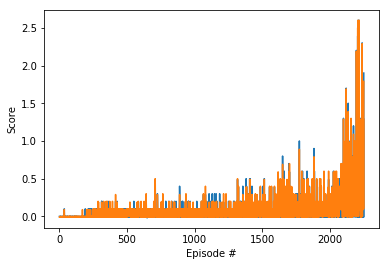

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
agent = MADDPG(state_size, action_size, num_agents, fc1, fc2, random_seed,
               buffer_size, batch_size, tau, gamma, lr_actor, lr_critic, weight_decay)

agent.load_state_dict('checkpoint_agent_')

highest_scores_for_all_episode = []

for i in range(1, 6):                                      # play game for 5 episodes

    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        agent.step(states, actions, rewards, next_states, dones)
        scores += rewards                                   # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break

    highest_scores_for_all_episode.append(max(scores))
    print('Highest Score from episode {}: {}'.format(i, max(scores)))
    
print('Average Score for last {:d} episodes: {:f}'.format(5, sum(highest_scores_for_all_episode)/5))

Loaded actor checkpoint to agent 0 from checkpoint_agent_0_actor.pth
Loaded critic checkpoint to agent 0 from checkpoint_agent_0_actor.pth
Loaded actor checkpoint to agent 1 from checkpoint_agent_1_actor.pth
Loaded critic checkpoint to agent 1 from checkpoint_agent_1_actor.pth
Highest Score from episode 1: 0.20000000298023224
Highest Score from episode 2: 0.5000000074505806
Highest Score from episode 3: 1.0000000149011612
Highest Score from episode 4: 0.09000000171363354
Highest Score from episode 5: 0.800000011920929
Average Score for last 5 episodes: 0.518000
